## Import Libraries

In [15]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline

## Read data

In [3]:
df = pd.read_csv('./data/emails.csv')
df = df.drop_duplicates()
df = df.reset_index(inplace=False)[['text', 'spam']]
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


## Clean data

In [4]:
clean_text = []
for text in df.text:
    text = re.sub('Subject: ', '', text)
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.lower()
    clean_text.append(text)

df['text'] = clean_text
df['text'].head()

0    naturally irresistible your corporate identity...
1    the stock trading gunslinger fanny is merrill ...
2    unbelievable new homes made easy im wanting to...
3     color printing special request additional inf...
4    do not have money get software cds from here s...
Name: text, dtype: object

## Mask image

In [17]:
img_path = Path('data', 'image.png')
img_mask = np.array(Image.open(img_path))

# img_resize = img.resize((np.array(img.size)/10).astype(int))

img_resize = img_mask.resize(np.array((img_mask.size)/10).astype(int))
img_resize_arr = np.asarray(img_resize)
img_resize_arr.shape

()

## Create masked wordcloud

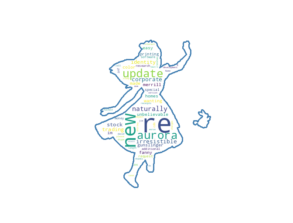

In [9]:
stopwords = set(STOPWORDS)

wc = WordCloud(background_color='white', max_words=2000, mask=img_mask, stopwords=stopwords, 
               contour_width=3, contour_color='steelblue').generate(str(df['text']))

plt.figure(figsize=(5,5), facecolor=None)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
wc.to_file(Path('result', 'img_mask.png'))